In [121]:
#pip install category_encoders

In [122]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [123]:
df = pd.read_csv("D:\DATA SCIENCE\DATA ANALYTICS\car_evaluation Ran_Forest.csv")

In [124]:
#EDA
df.shape

(1728, 7)

In [125]:
df

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [126]:
df.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], dtype='object')

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [128]:
#Frequency distribution of values in variables
#Now, I will check the frequency counts of categorical variables.
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
for col in col_names:
    print(df[col].value_counts())

buying
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
maint
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
doors
2        432
3        432
4        432
5more    432
Name: count, dtype: int64
persons
2       576
4       576
more    576
Name: count, dtype: int64
lug_boot
small    576
med      576
big      576
Name: count, dtype: int64
safety
low     576
med     576
high    576
Name: count, dtype: int64
class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64


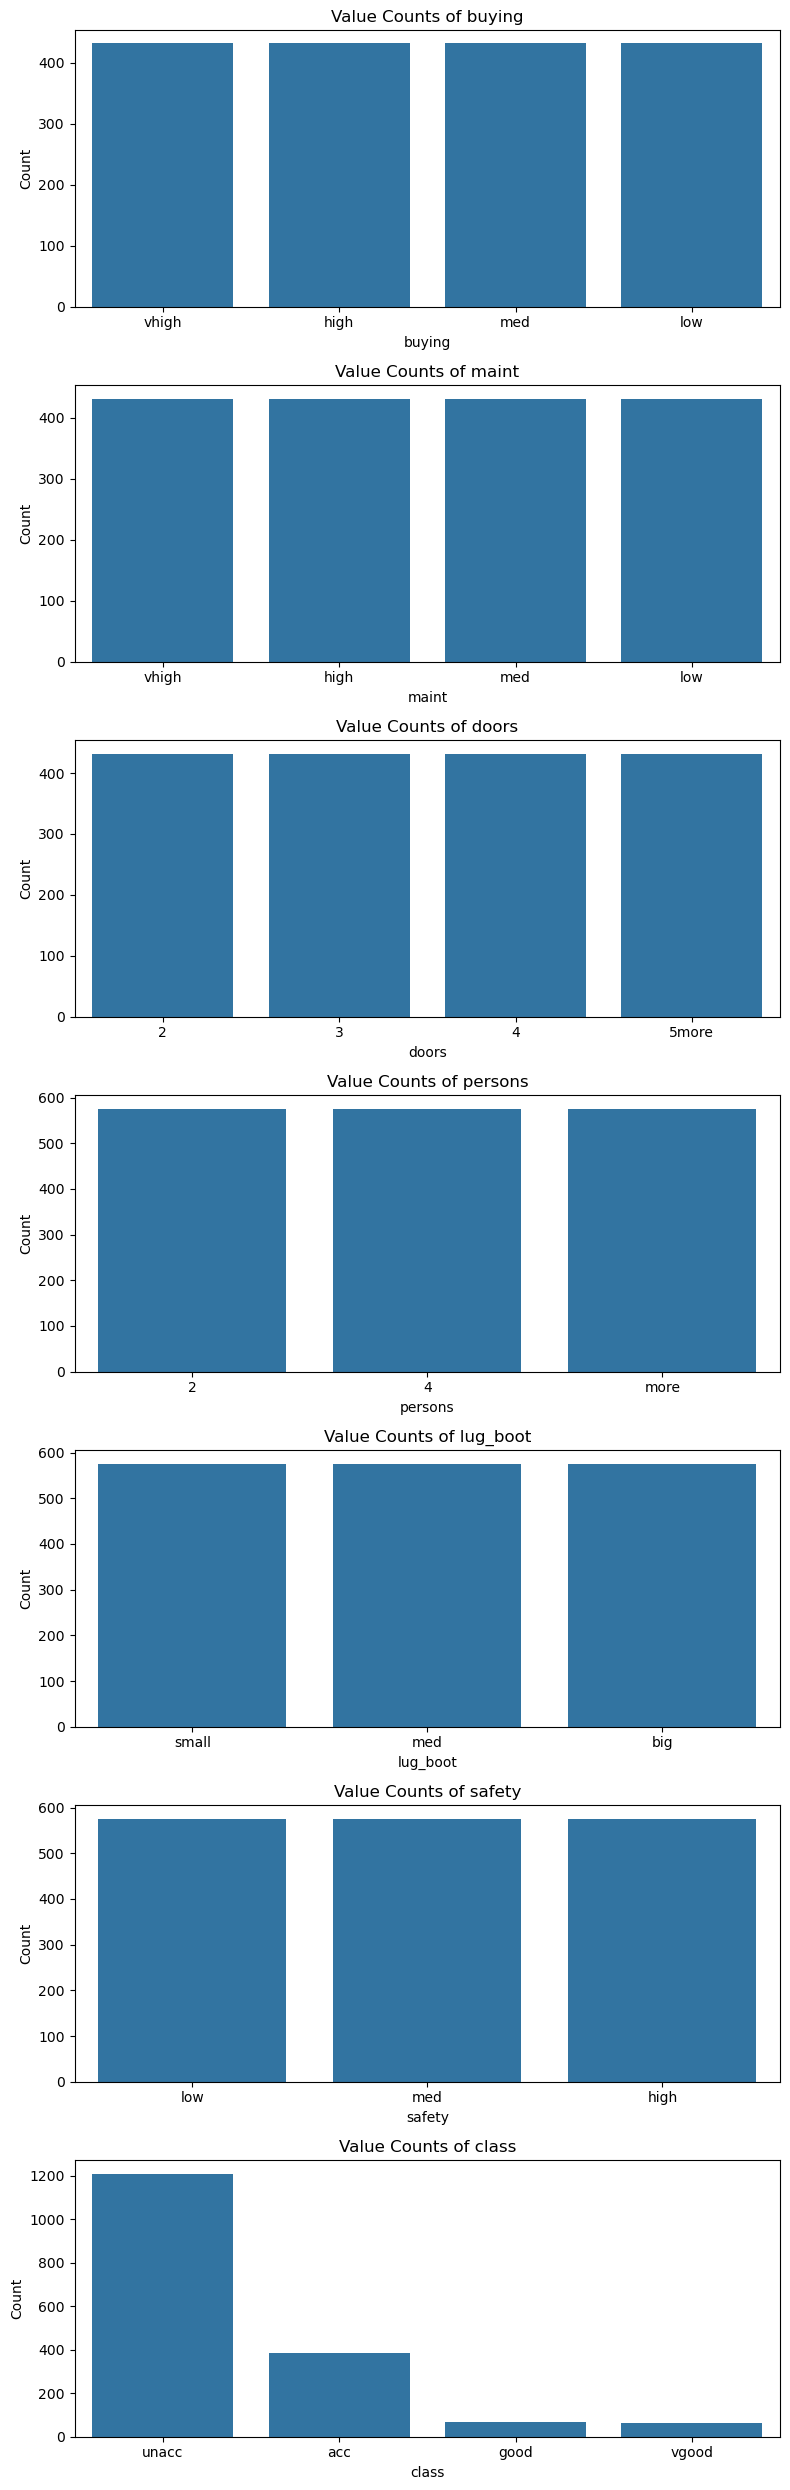

In [129]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the DataFrame contains the required columns
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

# Create subplots for each column
fig, axes = plt.subplots(len(col_names), 1, figsize=(8, 25))

for i, col in enumerate(col_names):
    # Get value counts for the column
    value_counts = df[col].value_counts()

    # Plot the bar graph
    sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[i])
    
    # Set titles and labels for each subplot
    axes[i].set_title(f'Value Counts of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

# Adjust layout so the plots are nicely spaced
plt.tight_layout()
plt.show()

In [130]:
df['class'].value_counts()

class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64

In [131]:
# check missing values in variables
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

We can see that there are no missing values in the dataset. I have checked the frequency distribution of values previously. It also confirms that there are no missing values in the dataset.

In [133]:
#Declare feature vector and target variable
X = df.drop(['class'], axis=1)
y = df['class']

In [134]:
#Split data into separate training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [135]:
#Feature Engineering 
# check data types in X_train
X_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

In [136]:
#Encode categorical variables
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
48,vhigh,vhigh,3,more,med,low
468,high,vhigh,3,4,small,low
155,vhigh,high,3,more,small,high
1721,low,low,5more,more,small,high
1208,med,low,2,more,small,high


In [137]:
X_test.head()

,buying,maint,doors,persons,lug_boot,safety
599,high,high,4,2,med,high
1201,med,low,2,4,med,med
628,high,high,5more,2,big,med
1498,low,high,5more,4,med,med
1263,med,low,4,more,med,low


In [138]:
X_train.shape

(1157, 6)

In [224]:
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [226]:
y_pred = clf.predict(X_train)
print('Model accuracy score with doors variable removed : {0:0.4f}'. format(accuracy_score(y_train, y_pred)))

Model accuracy score with doors variable removed : 0.9689


In [228]:
# Print the Confusion Matrix and slice it into four pieces
from sklearn.metrics import confusion_matrix
labels = ['unacc', 'acc', 'good', 'vgood']
cm = confusion_matrix(y_train, y_pred,labels=labels)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[792  18   3   0]
 [  7 247   1   0]
 [  0   0  46   3]
 [  0   2   2  36]]


For class 0, 792 out of 813 samples were correctly classified (accuracy is very high).

For class 2, the model performed almost perfectly with 46 out of 49 samples classified correctly.

In [230]:
#Classification Report 
from sklearn.metrics import classification_report
labels = ['unacc', 'acc', 'good', 'vgood']
print(classification_report(y_train, y_pred,labels=labels))

              precision    recall  f1-score   support

       unacc       0.99      0.97      0.98       813
         acc       0.93      0.97      0.95       255
        good       0.88      0.94      0.91        49
       vgood       0.92      0.90      0.91        40

    accuracy                           0.97      1157
   macro avg       0.93      0.95      0.94      1157
weighted avg       0.97      0.97      0.97      1157



In [143]:
one_hot_encoded_data = pd.get_dummies(X_train, columns = ['maint', 'safety'])
one_hot_encoded_data

,buying,doors,persons,lug_boot,maint_high,maint_low,maint_med,maint_vhigh,safety_high,safety_low,safety_med
48,vhigh,3,more,med,False,False,False,True,False,True,False
468,high,3,4,small,False,False,False,True,False,True,False
155,vhigh,3,more,small,True,False,False,False,True,False,False
1721,low,5more,more,small,False,True,False,False,True,False,False
1208,med,2,more,small,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1130,med,3,more,med,False,False,True,False,True,False,False
1294,med,5more,more,big,False,True,False,False,False,False,True
860,high,5more,more,med,False,True,False,False,True,False,False
1459,low,4,2,small,True,False,False,False,False,False,True


In [144]:
"""from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(sparse_output=False,handle_unknown='ignore').set_output(transform="pandas")"""

'from sklearn.preprocessing import OneHotEncoder\nohe=OneHotEncoder(sparse_output=False,handle_unknown=\'ignore\').set_output(transform="pandas")'

In [145]:
"""ohe_transform=ohe.fit_transform(df[['buying', 'maint', 'persons', 'lug_boot', 'safety']])
ohe_transform
encoder=pd.DataFrame(ohe_transform)
encoder.head()"""

"ohe_transform=ohe.fit_transform(df[['buying', 'maint', 'persons', 'lug_boot', 'safety']])\nohe_transform\nencoder=pd.DataFrame(ohe_transform)\nencoder.head()"

In [146]:
"""from sklearn.compose import ColumnTransformer

# Specify the categorical columns
categorical_columns = ['buying', 'maint','persons', 'lug_boot', 'safety']

# Initialize the OneHotEncoder
encoder = ColumnTransformer(
    transformers=[('onehot', OneHotEncoder(), categorical_columns)],
    remainder='passthrough'  # Keeps the rest of the columns as is
)"""

"from sklearn.compose import ColumnTransformer\n\n# Specify the categorical columns\ncategorical_columns = ['buying', 'maint','persons', 'lug_boot', 'safety']\n\n# Initialize the OneHotEncoder\nencoder = ColumnTransformer(\n    transformers=[('onehot', OneHotEncoder(), categorical_columns)],\n    remainder='passthrough'  # Keeps the rest of the columns as is\n)"

In [147]:
#we can see that all the variables are ordinal categorical data type
import category_encoders as ce

encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [148]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
48,1,1,1,1,1,1
468,2,1,1,2,2,1
155,1,2,1,1,2,2
1721,3,3,2,1,2,2
1208,4,3,3,1,2,2


In [149]:
X_test.head()

,buying,maint,doors,persons,lug_boot,safety
599,2,2,4,3,1,2
1201,4,3,3,2,1,3
628,2,2,2,3,3,3
1498,3,2,2,2,1,3
1263,4,3,4,1,1,1


In [150]:
#to finding out the best hyperparaameters
from sklearn.model_selection import GridSearchCV
parm_dict={'criterion':['gini'],'max_depth':range(1,10),'min_samples_split':range(1,10),'min_samples_leaf':range(1,3)}

In [151]:
from sklearn import tree
dt=tree.DecisionTreeClassifier()
grid=GridSearchCV(dt,param_grid=parm_dict,cv=3,verbose=1,n_jobs=-1)
grid.fit(X_train,y_train)

Fitting 3 folds for each of 162 candidates, totalling 486 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 3),
                         'min_samples_split': range(1, 10)},
             verbose=1)

In [152]:
from sklearn.pipeline import Pipeline
pipe=Pipeline([])
pipe.get_params()

{'memory': None, 'steps': [], 'verbose': False}

In [153]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 7}

In [154]:
#Random Forest Classifier model with default parameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0,n_estimators = 10)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [155]:
y_pred = rfc.predict(X_test)

In [156]:
from sklearn.metrics import accuracy_score
print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.9247


Here, y_test are the true class labels and y_pred are the predicted class labels in the test-set.

Here, I have build the Random Forest Classifier model with default parameter of n_estimators = 10. So, I have used 10 decision-trees to build the model. Now, I will increase the number of decision-trees and see its effect on accuracy.

In [159]:
#Random Forest Classifier model with parameter n_estimators=100
rfc_100 = RandomForestClassifier(n_estimators=100,random_state=0)
# fit the model to the training set
rfc_100.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [160]:
y_pred_100 = rfc_100.predict(X_test)
print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

Model accuracy score with 100 decision-trees : 0.9457


The model accuracy score with 10 decision-trees is 0.9247 but the same with 100 decision-trees is 0.9457. So, as expected accuracy increases with number of decision-trees in the model.

In [162]:
#Find important features with Random Forest model 
clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [163]:
"""# Get the correct feature names after one-hot encoding
feature_names = encoder.get_feature_names_out(categorical_columns)

# Convert to dense if the output is sparse
X_train_dense = X_train.toarray()

# Use feature names as the index for the feature scores
feature_scores = pd.Series(clf.feature_importances_, index=feature_names).sort_values()

# Display feature importance scores
feature_scores"""

'# Get the correct feature names after one-hot encoding\nfeature_names = encoder.get_feature_names_out(categorical_columns)\n\n# Convert to dense if the output is sparse\nX_train_dense = X_train.toarray()\n\n# Use feature names as the index for the feature scores\nfeature_scores = pd.Series(clf.feature_importances_, index=feature_names).sort_values()\n\n# Display feature importance scores\nfeature_scores'

In [164]:
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

safety      0.295319
persons     0.233856
buying      0.151734
maint       0.146653
lug_boot    0.100048
doors       0.072389
dtype: float64

We can see that the most important feature is "safety" and least important feature is doors

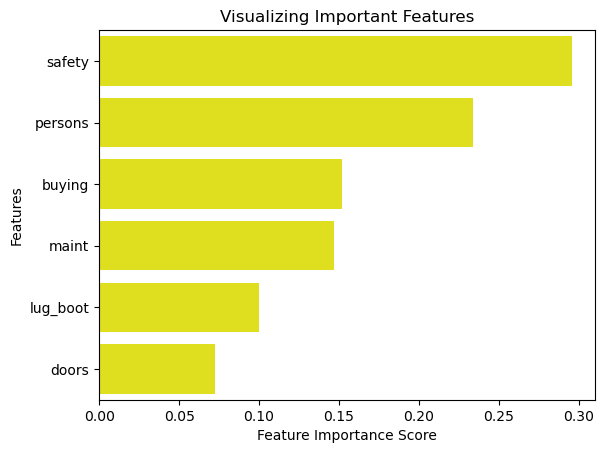

In [166]:
#Visualize feature scores of the features
sns.barplot(x=feature_scores, y=feature_scores.index,color='yellow')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [167]:
#Building Random Forest model on selected features
#Now, I will drop the least important feature doors from the model, rebuild the model and check its effect on accuracy.
X = df.drop(['class', 'doors'], axis=1)
y = df['class']

In [168]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [169]:
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'persons', 'lug_boot', 'safety'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [170]:
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [232]:
y_pred = clf.predict(X_test)
print('Model accuracy score with doors variable removed : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with doors variable removed : 0.9264


The accuracy of the model with doors variable removed is 0.9264. The accuracy of the model with all the variables taken into account is 0.9247.

In [235]:
# Print the Confusion Matrix and slice it into four pieces
from sklearn.metrics import confusion_matrix
labels = ['unacc', 'acc', 'good', 'vgood']
cm = confusion_matrix(y_test, y_pred,labels=labels)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[387  10   0   0]
 [ 10 104  12   3]
 [  0   0  18   2]
 [  0   3   2  20]]


The testing matrix shows more misclassifications, especially for class 1 and class 3.

For example, in the testing matrix:

387 out of 397 class 0 samples were correctly classified, with 10 being misclassified as class 1.

104 out of 129 class 1 samples were correctly classified, but 10 were misclassified as class 0, 12 as class 2, and 3 as class 3.

18 out of 20 class 2 samples were correctly classified, with 2 being misclassified as class 3.

20 out of 25 class 3 samples were correctly classified, but 3 were misclassified as class 1 and 2 as class 2.

In [237]:
#Classification Report 
from sklearn.metrics import classification_report
labels = ['unacc', 'acc', 'good', 'vgood']
print(classification_report(y_test, y_pred,labels=labels))

              precision    recall  f1-score   support

       unacc       0.97      0.97      0.97       397
         acc       0.89      0.81      0.85       129
        good       0.56      0.90      0.69        20
       vgood       0.80      0.80      0.80        25

    accuracy                           0.93       571
   macro avg       0.81      0.87      0.83       571
weighted avg       0.93      0.93      0.93       571



Precision: Measures how many of the predicted positive instances for a class were actually correct. A high precision means few false positives.

Recall: Measures how many actual positive instances for a class were correctly identified. A high recall means few false negatives.

F1-Score: The harmonic mean of precision and recall. It balances the two metrics into a single score, where a high F1-score indicates both precision and recall are strong.

Support: The number of actual instances of each class in the dataset.